In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
# Load extracted features
data = pd.read_csv('balanced_extracted_features_12000.csv')

# Split features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [3]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9071051970876224
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       937
           1       0.95      0.95      0.95      1004
           2       0.91      0.78      0.84      1020
           3       0.82      0.95      0.88      1022

    accuracy                           0.91      3983
   macro avg       0.91      0.91      0.91      3983
weighted avg       0.91      0.91      0.91      3983



In [33]:
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42, tree_method='gpu_hist')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:10:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9081094652272157
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       937
           1       0.95      0.95      0.95      1004
           2       0.91      0.79      0.84      1020
           3       0.83      0.94      0.88      1022

    accuracy                           0.91      3983
   macro avg       0.91      0.91      0.91      3983
weighted avg       0.91      0.91      0.91      3983



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:10:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


In [28]:
# One-hot encode labels
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Build Neural Network
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Neural Network
history = model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=100, batch_size=32)
y_pred_nn = model.predict(X_test)
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1)

# Evaluate Neural Network
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn_labels))
print(classification_report(y_test, y_pred_nn_labels))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


233/233 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5781 - loss: 1.0112 - val_accuracy: 0.7563 - val_loss: 0.5910
Epoch 2/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7377 - loss: 0.6196 - val_accuracy: 0.7924 - val_loss: 0.5229
Epoch 3/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7662 - loss: 0.5698 - val_accuracy: 0.8026 - val_loss: 0.4988
Epoch 4/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7932 - loss: 0.5211 - val_accuracy: 0.8128 - val_loss: 0.4720
Epoch 5/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8056 - loss: 0.5035 - val_accuracy: 0.8295 - val_loss: 0.4450
Epoch 6/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8110 - loss: 0.4964 - val_accuracy: 0.8295 - val_loss: 0.4280
Epoch 7/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8250 - loss: 0.4626 - val_accuracy: 0.8300 - val_loss: 0.4307
Epoch 8/100
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8193 - loss: 0.4500 - val_accuracy: 0.834

In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,094 (133.18 KB)

 Trainable params: 11,364 (44.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,730 (88.79 KB)

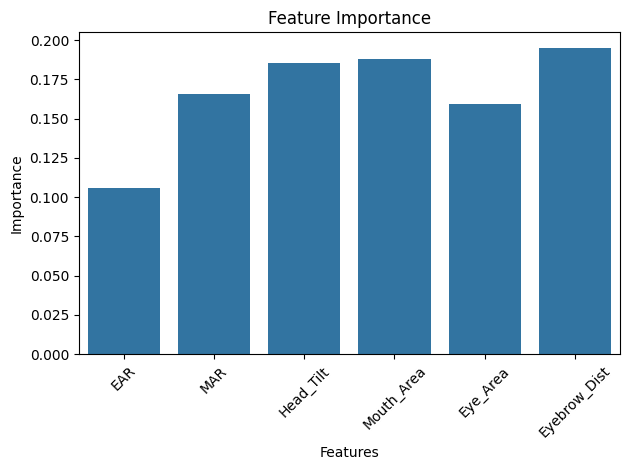

In [20]:
importances = rf_model.feature_importances_

# Extract feature names (all columns except the target column)
columns = data.columns[:-1]  # Exclude 'Engagement' (target column)

# Plot feature importance
sns.barplot(x=columns, y=importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



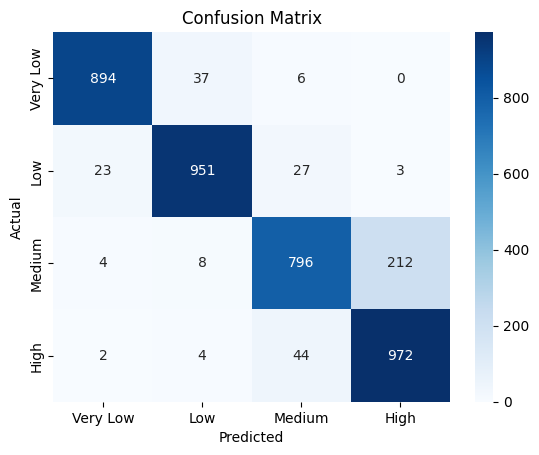

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Very Low', 'Low', 'Medium', 'High'], yticklabels=['Very Low', 'Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


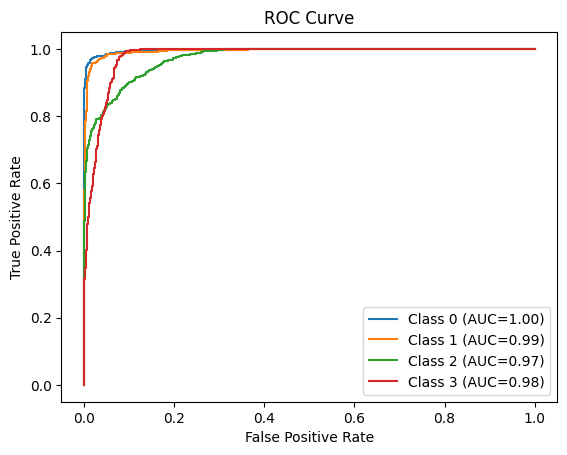

In [22]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_prob = xgb_model.predict_proba(X_test)

plt.figure()
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={auc:.2f})")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=200, random_state=42)

stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('mlp', mlp_model)
    ],
    final_estimator=LogisticRegression()  # Meta Learner
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9096158674366056

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       937
           1       0.95      0.96      0.95      1004
           2       0.90      0.79      0.84      1020
           3       0.83      0.94      0.88      1022

    accuracy                           0.91      3983
   macro avg       0.91      0.91      0.91      3983
weighted avg       0.91      0.91      0.91      3983


Confusion Matrix:
[[890  41   6   0]
 [ 16 961  25   2]
 [  2   8 809 201]
 [  2   1  56 963]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=200, random_state=42),
}

results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = class_report['macro avg']['f1-score']
    precision = class_report['macro avg']['precision']
    recall = class_report['macro avg']['recall']

    # ذخیره نتایج
    results.append([model_name, accuracy, precision, recall, f1_score])
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# تبدیل نتایج به DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])


Training Random Forest...
Random Forest Accuracy: 0.91
Training XGBoost...
XGBoost Accuracy: 0.90
Training Neural Network...
Neural Network Accuracy: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
results_df.to_csv('results.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Neural Network
y_pred_nn = model.predict(X_test)
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1)
nn_accuracy = accuracy_score(y_test, y_pred_nn_labels)
nn_report = classification_report(y_test, y_pred_nn_labels, output_dict=True)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)

y_pred_stacking = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
stacking_report = classification_report(y_test, y_pred_stacking, output_dict=True)

results = [
    {
        "Model": "Neural Network",
        "Accuracy": nn_accuracy,
        "Precision": nn_report['macro avg']['precision'],
        "Recall": nn_report['macro avg']['recall'],
        "F1-Score": nn_report['macro avg']['f1-score']
    },
    {
        "Model": "Random Forest",
        "Accuracy": rf_accuracy,
        "Precision": rf_report['macro avg']['precision'],
        "Recall": rf_report['macro avg']['recall'],
        "F1-Score": rf_report['macro avg']['f1-score']
    },
    {
        "Model": "XGBoost",
        "Accuracy": xgb_accuracy,
        "Precision": xgb_report['macro avg']['precision'],
        "Recall": xgb_report['macro avg']['recall'],
        "F1-Score": xgb_report['macro avg']['f1-score']
    },
    {
        "Model": "Stacking",
        "Accuracy": stacking_accuracy,
        "Precision": stacking_report['macro avg']['precision'],
        "Recall": stacking_report['macro avg']['recall'],
        "F1-Score": stacking_report['macro avg']['f1-score']
    }
]

# تبدیل به DataFrame
results_df = pd.DataFrame(results)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<ipython-input-36-29092093f615>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
<ipython-input-36-29092093f615>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
<ipython-input-36-29092093f615>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
<ipython-input-36-29092093f615>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

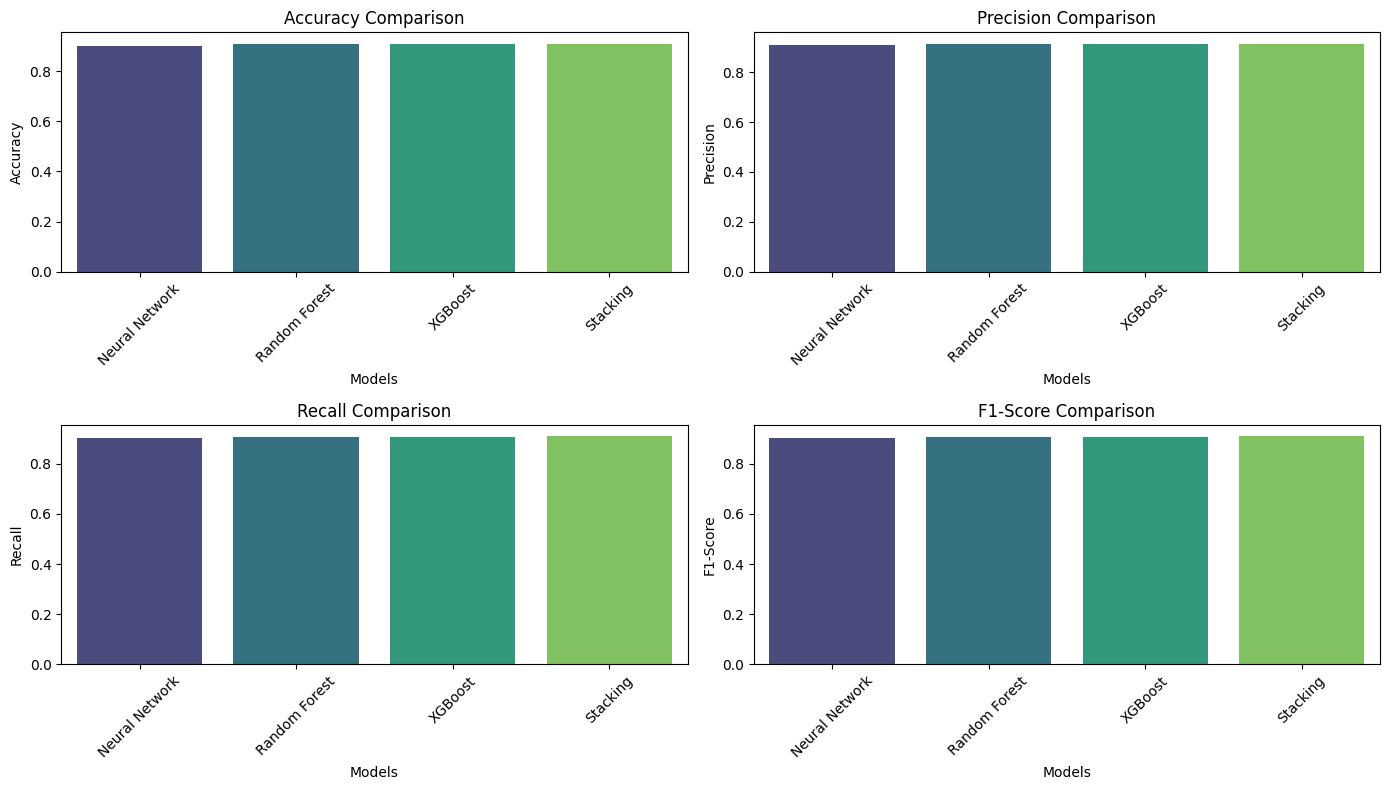

In [36]:
# نمودار مقایسه معیارها
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
    plt.title(f"{metric} Comparison")
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


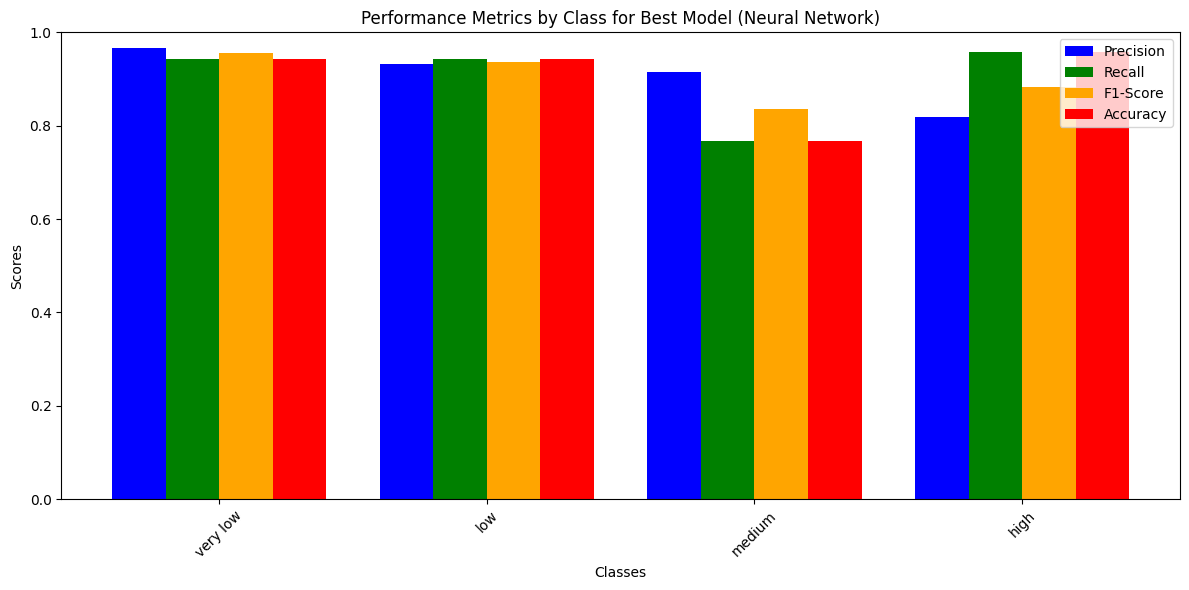

Overall Accuracy: 0.902083856389656


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# فرض کنید y_pred_nn احتمال‌های پیش‌بینی شده است و y_test برچسب‌های اصلی
# تبدیل y_pred_nn به برچسب کلاسی
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1)

# بررسی فرمت y_test
if len(y_test.shape) > 1 and y_test.shape[1] > 1:  # اگر y_test در فرمت one-hot است
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test  # اگر y_test از قبل برچسب است

# گزارش عملکرد
nn_report = classification_report(y_test_labels, y_pred_nn_labels, target_names=["very low", "low", "medium", "high"], output_dict=True)
nn_accuracy = accuracy_score(y_test_labels, y_pred_nn_labels)

# تبدیل گزارش به DataFrame
df_report = pd.DataFrame(nn_report).transpose()

# استخراج معیارها برای هر کلاس
metrics = ['precision', 'recall', 'f1-score']
class_metrics = df_report.loc["very low":"high", metrics]  # مقادیر هر کلاس

# محاسبه دقت برای هر کلاس از ماتریس درهم‌ریختگی
conf_matrix = confusion_matrix(y_test_labels, y_pred_nn_labels)
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)  # Accuracy برای هر کلاس
class_metrics['accuracy'] = class_accuracies

# رسم نمودار
x = np.arange(len(class_metrics.index))  # نام کلاس‌ها
width = 0.2  # عرض میله‌ها

plt.figure(figsize=(12, 6))

# رسم میله‌ها برای هر معیار
plt.bar(x - 1.5 * width, class_metrics['precision'], width, label='Precision', color='blue')
plt.bar(x - 0.5 * width, class_metrics['recall'], width, label='Recall', color='green')
plt.bar(x + 0.5 * width, class_metrics['f1-score'], width, label='F1-Score', color='orange')
plt.bar(x + 1.5 * width, class_metrics['accuracy'], width, label='Accuracy', color='red')

# تنظیمات نمودار
plt.xticks(x, ["very low", "low", "medium", "high"], rotation=45)
plt.ylim([0, 1])
plt.title("Performance Metrics by Class for Best Model (Neural Network)")
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.legend()
plt.tight_layout()
plt.show()

# چاپ گزارش عملکرد کلی
print(f"Overall Accuracy: {nn_accuracy}")


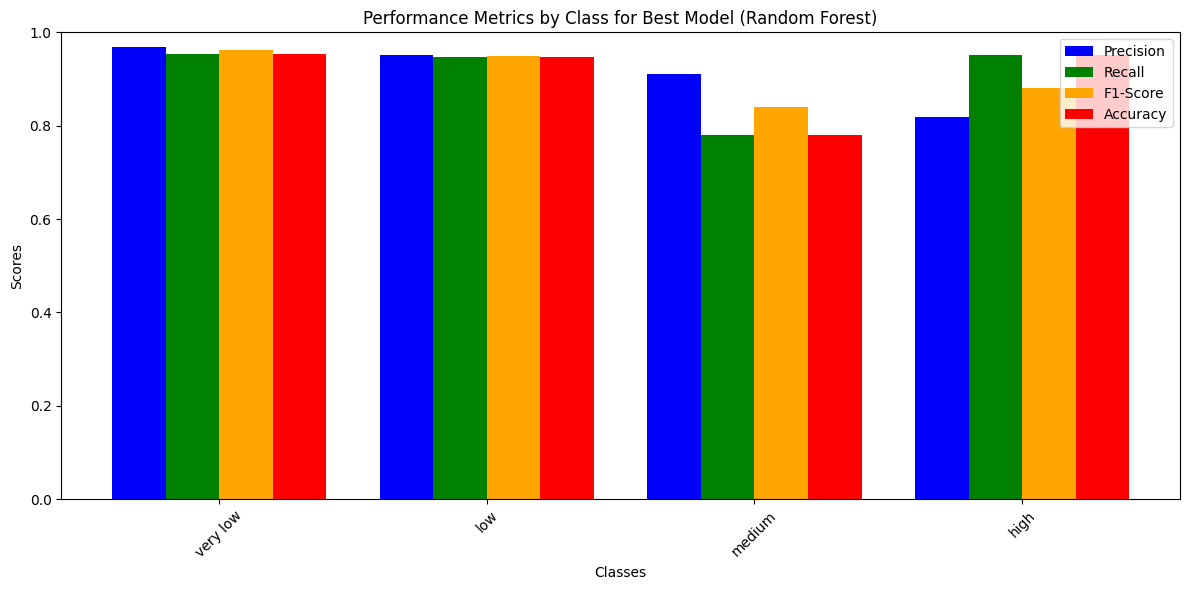

Overall Accuracy: 0.9071051970876224


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# محاسبه پیش‌بینی‌ها
y_pred_rf = rf_model.predict(X_test)

# گزارش عملکرد
rf_report = classification_report(y_test, y_pred_rf, target_names=["very low", "low", "medium", "high"], output_dict=True)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# تبدیل گزارش به DataFrame
df_rf_report = pd.DataFrame(rf_report).transpose()

# استخراج معیارها برای هر کلاس
metrics = ['precision', 'recall', 'f1-score']
class_metrics = df_rf_report.loc["very low":"high", metrics]  # مقادیر هر کلاس

# محاسبه دقت برای هر کلاس از ماتریس درهم‌ریختگی
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)  # Accuracy برای هر کلاس
class_metrics['accuracy'] = class_accuracies

# رسم نمودار
x = np.arange(len(class_metrics.index))  # نام کلاس‌ها
width = 0.2  # عرض میله‌ها

plt.figure(figsize=(12, 6))

# رسم میله‌ها برای هر معیار
plt.bar(x - 1.5 * width, class_metrics['precision'], width, label='Precision', color='blue')
plt.bar(x - 0.5 * width, class_metrics['recall'], width, label='Recall', color='green')
plt.bar(x + 0.5 * width, class_metrics['f1-score'], width, label='F1-Score', color='orange')
plt.bar(x + 1.5 * width, class_metrics['accuracy'], width, label='Accuracy', color='red')

# تنظیمات نمودار
plt.xticks(x, ["very low", "low", "medium", "high"], rotation=45)
plt.ylim([0, 1])
plt.title("Performance Metrics by Class for Best Model (Random Forest)")
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.legend()
plt.tight_layout()
plt.show()

# چاپ گزارش عملکرد کلی
print(f"Overall Accuracy: {rf_accuracy}")


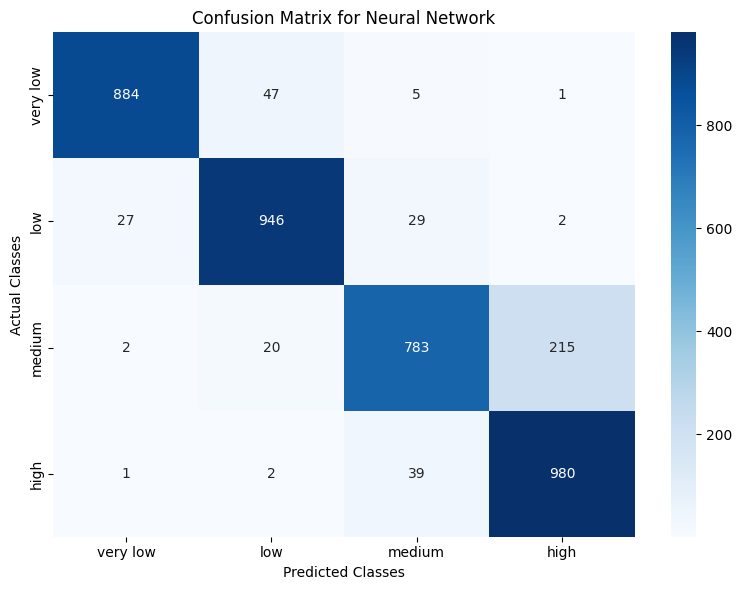

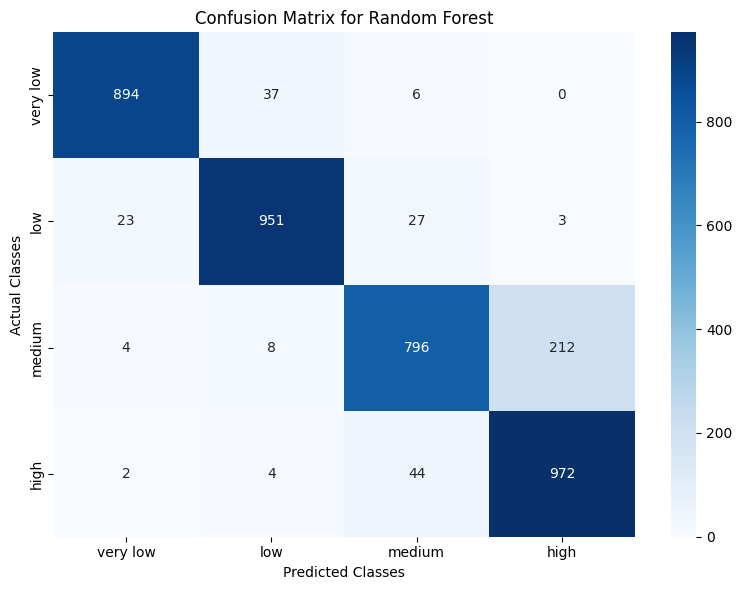

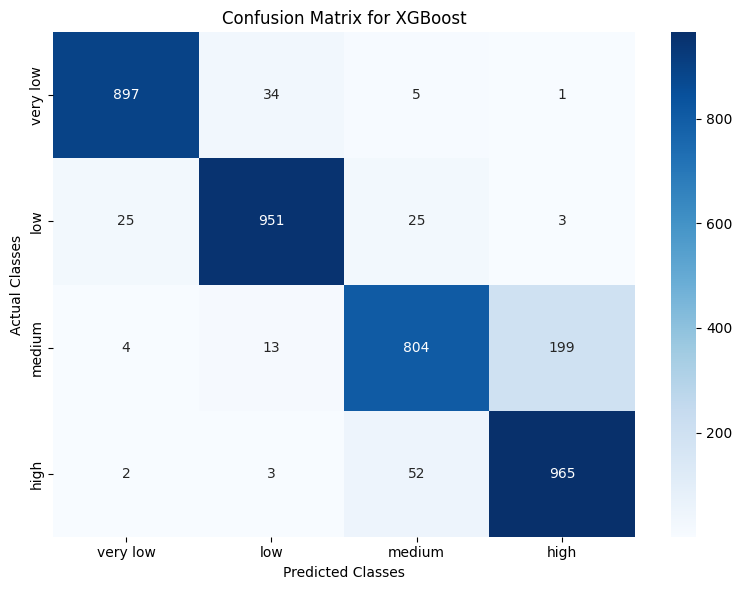

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# تابع برای رسم ماتریس آشفتگی
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=["very low", "low", "medium", "high"],
                yticklabels=["very low", "low", "medium", "high"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Classes")
    plt.ylabel("Actual Classes")
    plt.tight_layout()
    plt.show()

# Neural Network
plot_confusion_matrix(y_test, y_pred_nn_labels, "Neural Network")

# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

# (Optional) Another Model
# plot_confusion_matrix(y_test, y_pred_other_model, "Other Model")


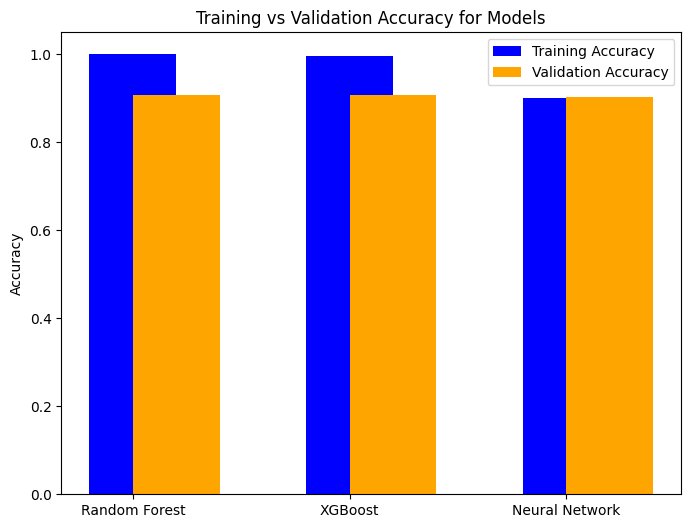

In [46]:
# Random Forest: Training and Validation Accuracy
rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))  # دقت روی داده‌های آموزش
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)  # دقت روی داده‌های تست

# XGBoost: Training and Validation Accuracy
xgb_train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
xgb_test_accuracy = accuracy_score(y_test, y_pred_xgb)

# Neural Network: Training and Validation Accuracy
nn_train_accuracy = history.history['accuracy'][-1]  # آخرین مقدار دقت در آموزش
nn_test_accuracy = accuracy_score(y_test, y_pred_nn_labels)  # دقت روی داده‌های تست

# مقایسه دقت‌ها در یک نمودار
train_accuracies = [rf_train_accuracy, xgb_train_accuracy, nn_train_accuracy]
val_accuracies = [rf_test_accuracy, xgb_test_accuracy, nn_test_accuracy]
models = ["Random Forest", "XGBoost", "Neural Network"]

# رسم نمودار مقایسه‌ای
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
x = range(len(models))
plt.bar(x, train_accuracies, width=0.4, label="Training Accuracy", color='blue', align='center')
plt.bar(x, val_accuracies, width=0.4, label="Validation Accuracy", color='orange', align='edge')
plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy for Models")
plt.legend()
plt.show()
